<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Laberinto_Profundidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolución de Laberinto en profundidad - Jesús Roque Armas Martín

**1 Crear el MAZE** como un numpy array de 10x10 relleno de ceros

**2 Ponerle los bordes a 0** dibujar los bordes


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import clear_output

def crear_maze(n,p):
  #n número de filas y columnas
  #p - porcentaje de obstáculos
  matriz_nueva = np.zeros([n, n],dtype = int)
  for i in range(1,n-1):
    for j in range(1,n-1):
      # creo todas las celdas como posibles caminos, celdas transitables
      matriz_nueva[i][j] =127  #CAMINOS
      #creo los bordes (muros)
      if i==0 or j==0 or i==n-1 or j==n-1:
        matriz_nueva[i][j] =0 #MUROS
      if random.randint(0, 100) < p:
        if i!=0 and i!=n-1 and j!=0 and j!=n-1:
          matriz_nueva[i][j] = 25 #OBSTACULOS
  matriz_nueva[1,1]=255 #entrada
  matriz_nueva[n-2,n-2]=176 #salida

  return matriz_nueva


**3 Crea la matriz MARK** copia de MAZE.


In [ ]:
def crear_mark(n):
  matriz_nueva = np.zeros([n,n],dtype = int)
  for i in range(n):
    for j in range(n):
      #creo los bordes
      if i==0 or j==0 or i==99 or j==99:
        matriz_nueva[i][j] =0 #MUROS
  return matriz_nueva

Visualizar la matriz:

In [ ]:
def dibujar_matriz(matriz):
  plt.figure()
  plt.imshow(matriz)
  plt.grid(False)
  plt.show()

crear matriz move


In [ ]:
def crear_move(diagonales):
  #creo los primeros cuatro movimientos y, como la mitad de los valores son 0, utilizo numpy.zeros
  if diagonales =='S':
    move_new=np.zeros([8,2],dtype=int) # Si se ha elegido la opción de utilizar las diagonales, son 8 movimientos posibles
  else :
    move_new=np.zeros([4,2],dtype=int) # Si no se han elegido las diagonales, sólo son 4
  move_new[0][1]=-1
  move_new[1][0]=1
  move_new[2][1]=1
  move_new[3][0]=-1
  #move= [(0, -1),  (1, 0),(0, 1), (-1, 0)]

  if diagonales =='S':
    # Siguiendo el esquema, añadimos los movimientos en diagonal
    move_new[4][0]=-1
    move_new[4][1]=-1
    move_new[5][0]= 1
    move_new[5][1]=-1
    move_new[6][0]= 1
    move_new[6][1]= 1
    move_new[7][0]=-1
    move_new[7][1]= 1
    #move= [(0, -1),  (1, 0),(0, 1), (-1, 0),(-1,-1),(1,-1),(1,1),(-1,1)]
  return move_new

5 Crea una clase Agente con los atributos x e y que almacenan su posición actual y el método mover(2) al que se le pasa un valor de 0 a 3 y modifica sus coordenadas de la manera indicada en las flechas.

In [ ]:
class Agente:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def mover(self, t):
      dir_x = move[t][0]
      dir_y = move[t][1]
      if dir_x + self.x<0:
        dir_x=0
      if dir_y + self.y<0:
        dir_y=0
      if dir_x + self.x>n-1:
        dir_x=0
      if dir_y + self.y>n-1:
        dir_y=0
      self.x += dir_x
      self.y += dir_y

Para la búsqueda en profundidad se usa una *Pila*.
En la pila se almacenan las posiciones visitadas, para ello , igal que en la búsqueda en abanico, creo una clase llamada ***Place*** que contendrá los atributos de fila y columna.

In [ ]:
class Place:
  def __init__(self,columna, fila ):
    self.columna = columna
    self.fila = fila
  def mostrar (self):
    print("(" + str(self.columna) + "," + str(self.fila) + ")")

Creo la función ***posicion_visitada (x,y)*** para saber si la búsqueda ha pasado por esa celda


In [ ]:
def posicion_visitada(x,y):
  if mark[x][y] ==0:
    return False
  else:
    return True

Método para resolver en profundidad




In [ ]:
def resolver_profundidad(maze, mark,move,pila,place, n):
  # Mientras haya elementos en la pila
  while pila:
    clear_output(wait=True)
    dibujar_matriz(mark)

    # Si llegamos a la meta (la última celda)
    if place.fila == n-2 and place.columna == n-2: # posición(n-2,n-2) - Salida
        marca_visitada(place.columna, place.fila)
        return True

    for direccion in range(len(move)):
        agente= Agente(place.columna,place.fila)
        g,h =agente.x ,agente.y
        agente.mover(direccion)
        g,h =agente.x ,agente.y
        place_actual =Place(agente.x,agente.y)
        if not posicion_visitada(g,h):
            pila.append(place_actual)
        # Si encuentra un muro, lo pinta en MARK
        if (g==0 or h==0 or g==n-1 or h==n-1 ) :
          marca_visitada(g,h) # Muro
          pila.pop()

        # Si la celda está dentro del laberinto y no ha sido visitada
        if g >= 1 and g <= n-2 and h <= n-2 and h >= 1:
          if maze[g][h] == 25: # obstáculo
            marca_visitada(g,h)
            pila.pop()
          if maze[g][h] == 127: # camino
          # Añado la celda a la pila y lo marco como visitada
            if not posicion_visitada(g,h):
              marca_visitada(g,h)

    place=pila.pop()
    if resolver_profundidad(maze,mark,move, pila, place,n):
         marca_visitada(place.columna, place.fila)
         return True

  # redibujo la matriz MARK después de las posibles marcas realizadas
  clear_output(wait=True)
  dibujar_matriz(mark)
  return False


Método para debuguear lo que se va metiendo en la pila

In [ ]:
def representar_pila(pila):
  cadena = ''
  for elemento in pila:
    cadena += str(elemento.columna) + ' ' + str(elemento.fila) + ' '
  return cadena

Método para marcar una celda como visitada

In [ ]:
def marca_visitada(x,y):
  mark[x][y] = maze[x][y]

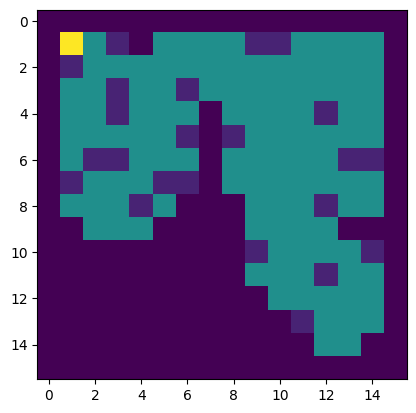

Laberinto resuelto
Rutas intentadas


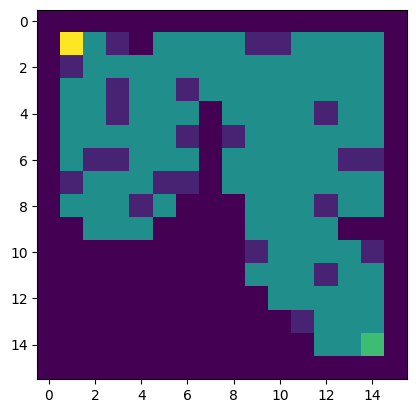

Original: 16x16 22% obstáculos


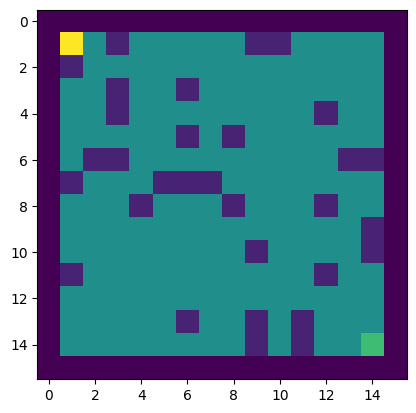

In [ ]:
#programa principal
#filas y columnas
n= int(input('Introduzca las dimensiones n del laberinto (n filas x n columnas):'))
#porcentaje de obstáculos
p =int(input('Introduzca el porcentaje de obstáculos (0-100):' ))
#diagonales
d =str(input('Se permiten las diagonales? (S/N):'))

maze = crear_maze(n,p)
mark =crear_mark(n)
move =crear_move(d)
dibujar_matriz (maze)

# Defino la posición inicial
inicio = Place(1,1)
# Agregamos la posición inicial a la cola
pila =[]
pila.append (inicio)
# Defino la posición final

#marco la posición inicial en mark, como ya visitada
marca_visitada(1,1)

if resolver_profundidad(maze,mark,move,pila, inicio, n):
  solucion='Laberinto resuelto'
else:
  solucion='El laberinto no se puede resolver'

clear_output(wait=True)
print (solucion)
print('Rutas intentadas')
dibujar_matriz (mark)

print('Original: ' +  str(n) + 'x' + str(n)  + ' ' + str(p) + '% obstáculos')
dibujar_matriz(maze)